In [1]:
#importing required libraries
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
#changing and verifying directory
os.chdir(r"D:\edwisor Qs\P1. Bike Rental")
os.getcwd()

'D:\\edwisor Qs\\P1. Bike Rental'

In [51]:
#loading the CSV file
day = pd.read_csv("day.csv", sep = ",", encoding = "ISO-8859-1")

In [52]:
#checking shape
day.shape

(731, 16)

In [53]:
#checking head
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
#checking unique values
for i in day:
    print(day[i].value_counts())

731    1
251    1
249    1
248    1
247    1
      ..
486    1
485    1
484    1
483    1
1      1
Name: instant, Length: 731, dtype: int64
2012-09-10    1
2011-07-06    1
2012-12-09    1
2011-05-12    1
2011-03-18    1
             ..
2012-09-07    1
2011-10-09    1
2012-11-18    1
2011-05-07    1
2012-02-06    1
Name: dteday, Length: 731, dtype: int64
3    188
2    184
1    181
4    178
Name: season, dtype: int64
1    366
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
0    710
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
1    500
0    231
Name: workingday, dtype: int64
1    463
2    247
3     21
Name: weathersit, dtype: int64
0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
           ..
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: tem

In [55]:
#checking empty values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No empty values, that is a relief!

In [56]:
#checking data types
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Exploratory Data Analysis

Firstly, before proceeding further, using common sense I shall drop **instant**, as instant is just the instant number or the serial number, if you will, and that has no effect on bike rental count.

I will also drop **dteday** because that is just the dates for the two years and all dates have been actually split up into more useful features, like **mnth**, **holiday**, **weekday** and **workingday**. Moreover, keeping the date and using *datetime* to parse and format it only leads to complications in the program.

In [57]:
#dropping instant and dteday
day = day.drop(["instant", "dteday"], axis = 1)

Also, just to make it simple, I will drop **casual** and **registered** because of a multitude of reasons. For starters, **casual** refers to the number of bike rentals that were made without any registrations. And **registered** refers to the number of people who actually registered for bikes and then they made the rent. I see that both **casual** and **registered** sum up to give us the total number of **cnt**. Now this can be approached in two ways:

+ One model can be made to predict **casual** and another separate model could be made to predict **registered** and then both these numbers could be summed up.
+ Both these variables can be dropped and one model could be built to predict the overall count.

The reason I decided to go the second route is for ease of complexity. At the end of the day, both **casual** and **registered** are just features which can be summed up to get **cnt**. Also, when predicting for the future, a person would NOT think about how many casual and registered bike rentals were made. He would rather go for other important features like **season**, **holiday**, **temp**, **hum**, **weathersit** etc. While **casual** and **registered** are important for businesses who would like to analyze how different factors like weather and month affect the casual and registered counts separately, it is not important in this case. Keeping this in mind, I will drop **casual** and **registered** too.

In [58]:
#dropping casual and registered
day = day.drop(["casual", "registered"], axis = 1)

In [59]:
#checking new shape
day.shape

(731, 12)

In [60]:
#checking new head
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Next, the **levels** of **categorical variables** come up as **int** type, they will be converted to **categorical variables** for ease. Also, **temp**, **atemp**, **hum** and **windspeed** will be converted to actual.

In [61]:
#season
day["season"] = day["season"].replace(1, "spring")
day["season"] = day["season"].replace(2, "summer")
day["season"] = day["season"].replace(3, "fall")
day["season"] = day["season"].replace(4, "winter")

In [62]:
#year
day["yr"] = day["yr"].replace(0, "2011")
day["yr"] = day["yr"].replace(1, "2012")

In [63]:
#month
day["mnth"] = day["mnth"].replace(1, "Jan")
day["mnth"] = day["mnth"].replace(2, "Feb")
day["mnth"] = day["mnth"].replace(3, "Mar")
day["mnth"] = day["mnth"].replace(4, "Apr")
day["mnth"] = day["mnth"].replace(5, "May")
day["mnth"] = day["mnth"].replace(6, "Jun")
day["mnth"] = day["mnth"].replace(7, "Jul")
day["mnth"] = day["mnth"].replace(8, "Aug")
day["mnth"] = day["mnth"].replace(9, "Sep")
day["mnth"] = day["mnth"].replace(10, "Oct")
day["mnth"] = day["mnth"].replace(11, "Nov")
day["mnth"] = day["mnth"].replace(12, "Dec")

In [64]:
#holiday
day["holiday"] = day["holiday"].replace(0, "No")
day["holiday"] = day["holiday"].replace(1, "Yes")

In [65]:
#weekday
day["weekday"] = day["weekday"].replace(0, "Sun")
day["weekday"] = day["weekday"].replace(1, "Mon")
day["weekday"] = day["weekday"].replace(2, "Tue")
day["weekday"] = day["weekday"].replace(3, "Wed")
day["weekday"] = day["weekday"].replace(4, "Thu")
day["weekday"] = day["weekday"].replace(5, "Fri")
day["weekday"] = day["weekday"].replace(6, "Sat")

In [66]:
#working day
day["workingday"] = day["workingday"].replace(0, "No")
day["workingday"] = day["workingday"].replace(1, "Yes")

In [67]:
#weathersit
day["weathersit"] = day["weathersit"].replace(1, "Clear")
day["weathersit"] = day["weathersit"].replace(2, "Mist/Cloudy")
day["weathersit"] = day["weathersit"].replace(3, "Light Snow/Light Rain")
day["weathersit"] = day["weathersit"].replace(4, "Heavy Rain/Thunderstorm/Heavy Snow")

In [68]:
#temp
day["temp"] = (day["temp"] * (47)) - 8

In [69]:
#atemp
day["atemp"] = (day["atemp"] * (66)) - 16

In [70]:
#hum
day["hum"] = day["hum"] * 100

In [71]:
#windspeed
day["windspeed"] = day["windspeed"] * 67

In [72]:
#checking head
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2011,Jan,No,Sat,No,Mist/Cloudy,8.175849,7.999250,80.5833,10.749882,985
1,spring,2011,Jan,No,Sun,No,Mist/Cloudy,9.083466,7.346774,69.6087,16.652113,801
2,spring,2011,Jan,No,Mon,Yes,Clear,1.229108,-3.499270,43.7273,16.636703,1349
3,spring,2011,Jan,No,Tue,Yes,Clear,1.400000,-1.999948,59.0435,10.739832,1562
4,spring,2011,Jan,No,Wed,Yes,Clear,2.666979,-0.868180,43.6957,12.522300,1600


In [73]:
#checking dtypes
day.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [29]:
#write to disk
day.to_csv("day_eda.csv")

## Visualizing the data

Let us first visualize some variables and see how they affect the total count. For example, I wanted to see how **season** affects the bike rental count. I would also like to see how **mnth**, **holiday**, **weekday**, **workingday** and **weathersit** influence the final count, just to name a few variables. This is just a test to see if someone can predict the count more or less, depending on each of the above variables themselves. 

*Note - This proves nothing in the long run, as we are more concerned to find out how all the variables combine in the long run to predict the count.*

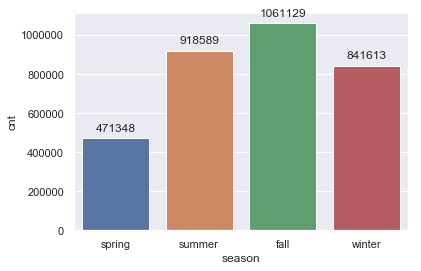

In [74]:
#checking season vs cnt
sns.set()
ax = sns.barplot(x=day["season"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The above plot shows that the maximum number of bike rentals come during the **fall** season, followed by **summer**, then **winter** and finally **spring**. This data can be used as a rough estimator of when the bike rental company can do let's say, maximum advertising/promotion, to make maximum profits.

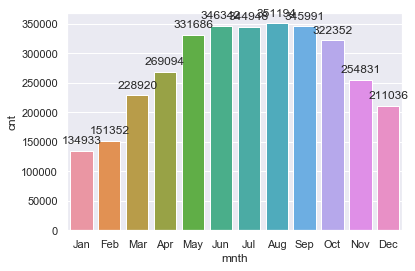

In [75]:
#checking mnth vs cnt
sns.set()
ax = sns.barplot(x=day["mnth"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The above plot shows that while the difference in counts is less obvious while moving from months like June to July or August to September, it is more obvious for other pairs like February and March or October and November. Thus in some cases a change in month does not affect the bike rental count, whereas in other cases it does.

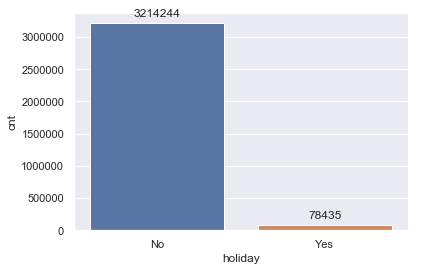

In [76]:
#checking holiday vs cnt
sns.set()
ax = sns.barplot(x=day["holiday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The explanation for the above plot is as clear as day. If it is not a holiday, a very large number of people are expected to rent bikes, because they need to travel to their place of work, for example. During holidays, people generally like to chill out in their homes and take the day off.

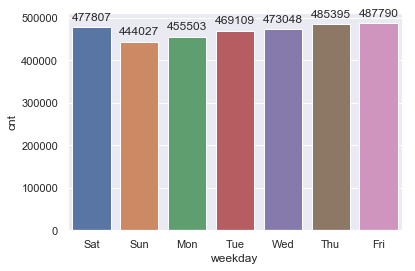

In [77]:
#checking weekday vs cnt
sns.set()
ax = sns.barplot(x=day["weekday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The above plot confirms that comparison of renting of bikes with the day of the week is more or less the same, when it comes to distribution. This plot would be inconclusive for bike rental companies, as a change in the day of the week does not make a difference in the number of bikes rented.

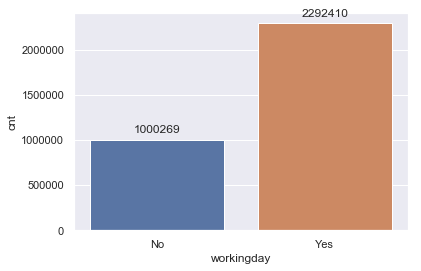

In [78]:
#checking workingday vs cnt
sns.set()
ax = sns.barplot(x=day["workingday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The above plot also states the obvious in the sense that more people are expected to rent bikes on working days versus non-working days, for the same reason as mentioned above. On working days, people are expected to commute more.

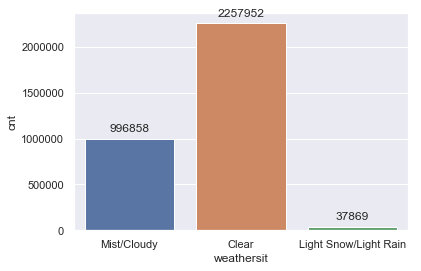

In [79]:
#checking weather vs cnt
sns.set()
ax = sns.barplot(x=day["weathersit"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

As we can see, the maximum rentals are made when the weather is clear, followed by mist/cloudy conditions. And very less people travel by bikes during light snow/light rain. This fact is apparent by the above graph.

Now let us see the distribution of some **categorical** variables using barplots and distribution of some **continuous** variables using histograms, just to get a fair idea of the variables involved, and if they are normally distributed or not, or skewed or not.

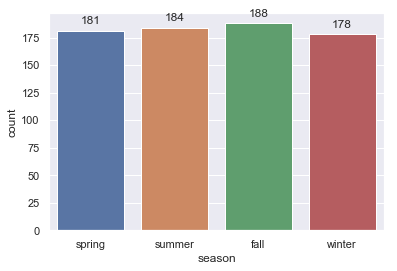

In [80]:
##plotting some categorical variables first
#plotting distribution of season
sns.set()
ax = sns.countplot(x=day["season"], y=None, hue=None, data=day)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The above plot shows that the seasons are failry distributed, all having equal counts. This is because data from two full years were chosen for this operation.

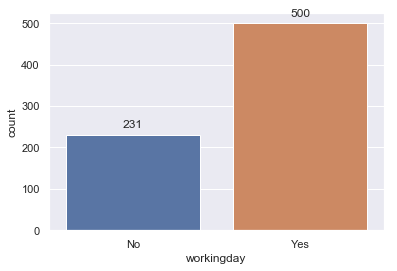

In [81]:
#plotting distribution of workingday
sns.set()
ax = sns.countplot(x=day["workingday"], y=None, hue=None, data=day)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The plot above shows that the number of working days is more than the number of non-working days for the two years, which is fairly obvious.

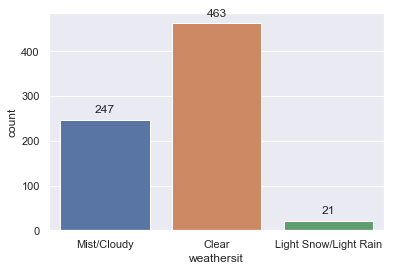

In [82]:
#plotting distribution of weather
sns.set()
ax = sns.countplot(x=day["weathersit"], y=None, hue=None, data=day)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

This shows that the number of days having clear weather were far greater in the dataset, followed by mist/cloudy conditions. Light snow/light rain had the lowest frequency.

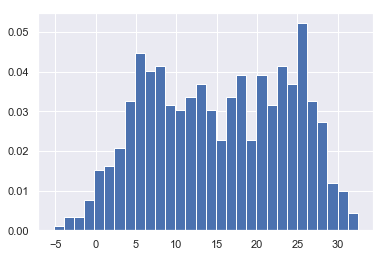

In [83]:
##plotting continuous variables
#plotting distribution of temp
plt.hist(day["temp"], normed=True, bins=30)
plt.show()

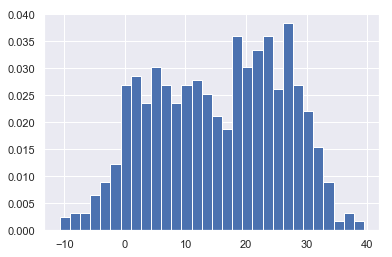

In [84]:
#plotting distribution of atemp
plt.hist(day["atemp"], normed=True, bins=30)
plt.show()

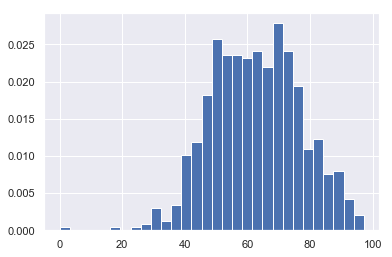

In [85]:
#plotting distribution of hum
plt.hist(day["hum"], normed=True, bins=30)
plt.show()

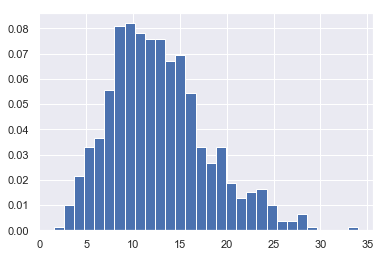

In [86]:
#plotting distribution of windspeed
plt.hist(day["windspeed"], normed=True, bins=30)
plt.show()

The above histograms show that while **temp** and **atemp** do not show any skewness, **hum** shows some skewness towards the right and **windspeed** shows some skewness towards the left.

## Outlier Analysis

Now that more or less all the variables have been visualized and a clearer picture has been obtained regarding how the different variables affect the count of bikes rented indivudually, I still need to figure out how all these variables combine together to affect the count. 

In order to go about this, let us first observe the presence of outliers in the data. Outlier analysis works on **continuous** variables only so I will only be working on those variables. We know that too may outliers can greatly affect the overall outcome, as they tend to bias the data towards one particular variable.

To check outliers, let us first view boxplots for all **continuous** variables, namely **temp**, **atemp**, **hum** and **windspeed**.

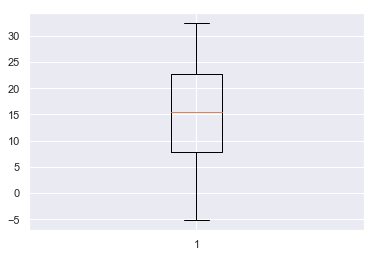

In [87]:
#boxplot for temp
%matplotlib inline
plt.boxplot(day["temp"])
plt.show()

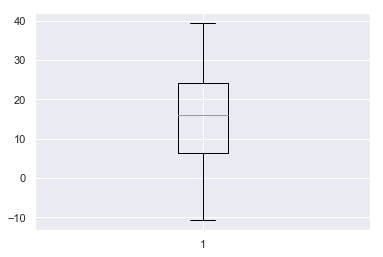

In [88]:
#boxplot for atemp
%matplotlib inline
plt.boxplot(day["atemp"])
plt.show()

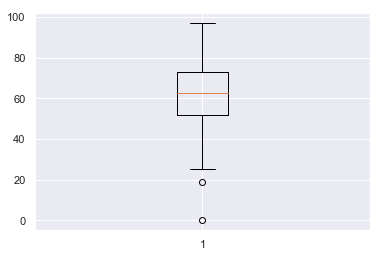

In [89]:
#boxplot for hum
%matplotlib inline
plt.boxplot(day["hum"])
plt.show()

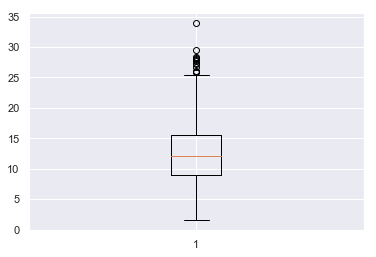

In [90]:
#boxplot for windspeed
%matplotlib inline
plt.boxplot(day["windspeed"])
plt.show()

From the above boxplots, we see that **temp** and **atemp** do NOT have any outliers, while **hum** and **windpeed** do. Let us explore **hum** and **windpeed** further by taking a look at their medians and percentiles and their unique values.

In [91]:
#checking medians and percentiles
for i in ["hum", "windspeed"]:
    print(i)
    q75, q25 = np.percentile(day[i], [75, 25])
    print("q75 = ", q75, "q25 = ", q25)
    iqr = q75 - q25
    print("iqr = ",iqr)
    mini = q25 - (iqr * 1.5)
    maxi = q75 + (iqr * 1.5)
    print("minimum = ",mini, "maximum = ",maxi)

hum
q75 =  73.02085 q25 =  52.0
iqr =  21.020849999999996
minimum =  20.468725000000006 maximum =  104.55212499999999
windspeed
q75 =  15.6253715 q25 =  9.041649999999999
iqr =  6.583721500000001
minimum =  -0.8339322500000019 maximum =  25.50095375


In [92]:
#checking unique values using bins
print(day["hum"].value_counts(ascending = True, bins = 5))
print(day["windspeed"].value_counts(ascending = False, bins = 7))

(-0.0982, 19.45]      2
(19.45, 38.9]        21
(77.8, 97.25]       107
(38.9, 58.35]       268
(58.35, 77.8]       333
Name: hum, dtype: int64
(10.786, 15.429]    253
(6.143, 10.786]     225
(15.429, 20.072]    123
(1.467, 6.143]       59
(20.072, 24.714]     54
(24.714, 29.357]     15
(29.357, 34.0]        2
Name: windspeed, dtype: int64


We can see that, for **hum**, the boxplot shows that it has two ouutliers, and both lie below 20.46, which is the minimum value. Taking a look at the bins, we can confirm this fact. Only 2 values lie in the interval (-0.0982, 19.45]. So we do NOT need to remove these outliers because there are only two of them.

However, **windspeed** has a lot more outliers, all of which are greater than 25.50, the maximum value. Let us see how many.

In [93]:
#checking how many outliers windspeed has
j = 0
for i in day["windspeed"]:
    if i > maxi:
        print(i)
        j += 1
print("\nTotal number of outliers =", j)

27.999836
34.000021
25.833257
26.000488999999998
28.292425
27.833743
27.417203999999998
28.250014
29.584721
27.7916
25.917007
26.666535999999997
27.292182

Total number of outliers = 13


So we see there are 13 outliers in **windspeed**. 13 outliers out of a total number of 731 observations is not bad, but still let us fix that just to get an improvement. First I will remove the outliers and make them NaN.

In [94]:
#let us save a copy first
safe = day.copy()

In [95]:
#making all outliers NaN
for i in range(0, len(day)): #row ops
    if day["windspeed"].loc[i] > maxi or day["windspeed"].loc[i] < mini:
        day["windspeed"].loc[i] = np.nan

#verifying number of NaNs
day["windspeed"].isnull().sum()

13

Now I will make one particular value NaN and check by imputing the median, and then the mean. Let us see which gives a more accurate result.

In [96]:
#checking one particular value
day["windspeed"][300]

15.375093

In [97]:
#making it NaN
day["windspeed"][300] = np.nan

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
#imputing with median
day["windspeed"] = day["windspeed"].fillna(day["windspeed"].median())

In [99]:
#checking 300th value
day["windspeed"][300]

11.959232000000002

The median imputation gives a value of 11.95.

In [100]:
#loading from safe
day = safe.copy()

In [101]:
#making all outliers NaN
for i in range(0, len(day)): #row ops
    if day["windspeed"].loc[i] > maxi or day["windspeed"].loc[i] < mini:
        day["windspeed"].loc[i] = np.nan

#verifying number of NaNs
day["windspeed"].isnull().sum()

13

In [102]:
#checking a particular value
day["windspeed"][300]

15.375093

In [103]:
#making it NaN
day["windspeed"][300] = np.nan

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
#imputing with mean
day["windspeed"] = day["windspeed"].fillna(day["windspeed"].mean())

In [105]:
#checking 300th value
day["windspeed"][300]

12.48422462887029

The mean imputation gives a value of 12.48.

We see here that the original 300th value was 15.37. After imputing with the **median** method, its new value was 11.95. However, the **mean** method gave us a new value of 12.48. So clearly, the mean method is the more accurate one. So we will freeze that method. 

I will replace the 300th value with its original value of 15.37 and then save this file in my system.

In [106]:
#replacing 300th value with original value
day["windspeed"][300] = 15.375093

#writing file to disk
day.to_csv("day_after_outlieranalysis.csv")

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Feature Selection

Here we do **correlation analysis** for continuous variables and eliminate if necessary. We do **chi-square test** for categorical variables and eliminate if necessary.

In [107]:
#checking head now
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2011,Jan,No,Sat,No,Mist/Cloudy,8.175849,7.999250,80.5833,10.749882,985
1,spring,2011,Jan,No,Sun,No,Mist/Cloudy,9.083466,7.346774,69.6087,16.652113,801
2,spring,2011,Jan,No,Mon,Yes,Clear,1.229108,-3.499270,43.7273,16.636703,1349
3,spring,2011,Jan,No,Tue,Yes,Clear,1.400000,-1.999948,59.0435,10.739832,1562
4,spring,2011,Jan,No,Wed,Yes,Clear,2.666979,-0.868180,43.6957,12.522300,1600


In order to check for multicollinearity, first I am storing the names of all continuous variables in **cont** and categorical variables in **categ**.

Then, I am splitting the entire dataset into two parts, **sub_cont** has all the continuous variables and **sub_categ** has all the categorical variables.

In [108]:
#splitting up column names into cont and categ
cont = ["temp", "atemp", "hum", "windspeed", "cnt"]
categ = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

#subsetting out day into datasets having continuous and categorical variables
sub_cont = day.loc[:, cont]
sub_categ= day.loc[:, categ]

Now, let us build a **correlation plot** including all the **continuous** variables.

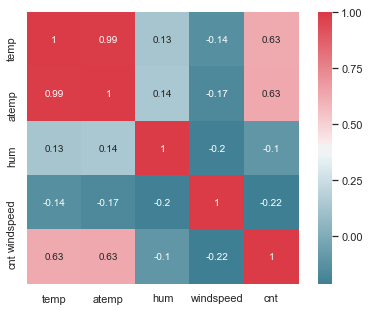

In [109]:
##building correlation plot
#setting width and height of plot
f, ax = plt.subplots(figsize = (7, 5))

#generate the correlation matrix
corr = sub_cont.corr()

#putting corr into perspective via heatmap
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True, cbar = True)



One of the major takeaways from the above correlation plot is that **temp** and **atemp** are highly correlated as their correlation value is 0.99. This makes sense because the feeling temperature will generally be closer to the actual temperature, and as such the feeling temperature on its own will not determine if a person would rent a bike or not. So **atemp** can be dropped.

Generally speaking, all other independent variables here (**temp**, **hum** and **windspeed**) do not have high collinearity with each other. This indicates that these three do NOT depend on each other and can stay in that regard.

Another aspect to consider here is the dependancy of each independent variable with the dependent variable **cnt**. Here, **temp** has a dependency of 0.63 with **cnt**, this means that **temp** is an actual influencer on **cnt**, and it needs to stay. But the same cannot be said for **hum** and **windspeed**. Both these variables have very low dependency on **cnt**. This essentially means that **hum** and **windspeed** cannot really explain **cnt** well. They do not really affect the count. Owing to this, **hum** and **windspeed** can be dropped.

In [110]:
#saving to disk before the drop
day.to_csv("before_drop_12.csv")

In [110]:
#dropping atemp, hum and windspeed
day = day.drop(["atemp", "hum", "windspeed"], axis = 1)

In [111]:
#checking new shape
day.shape

(731, 9)

In [112]:
#checking new head
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,cnt
0,spring,2011,Jan,No,Sat,No,Mist/Cloudy,8.175849,985
1,spring,2011,Jan,No,Sun,No,Mist/Cloudy,9.083466,801
2,spring,2011,Jan,No,Mon,Yes,Clear,1.229108,1349
3,spring,2011,Jan,No,Tue,Yes,Clear,1.400000,1562
4,spring,2011,Jan,No,Wed,Yes,Clear,2.666979,1600


In [121]:
#saving to disk after cont drop
day.to_csv("cont_dropped_9.csv")

Now, let us implement a **chi-square test** for all the **categorical** variables.

In [113]:
#chi-square test for categorical
for i in categ:
    print("\nChi-square test for: ", i)
    for j in categ:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(day[i], day[j]))
        print(j, ":", p)
        


Chi-square test for:  season
season : 0.0
yr : 0.9999288084245916
mnth : 0.0
holiday : 0.6831687073042003
weekday : 0.9999999999988407
workingday : 0.8865568364019545
weathersit : 0.02117930104473366

Chi-square test for:  yr
season : 0.9999288084245916
yr : 4.0118539920135064e-160
mnth : 0.9999999999999892
holiday : 0.9949247279855291
weekday : 0.9999995848511959
workingday : 0.9799434134248637
weathersit : 0.12737941480418666

Chi-square test for:  mnth
season : 0.0
yr : 0.9999999999999892
mnth : 0.0
holiday : 0.5593083086035064
weekday : 1.0
workingday : 0.9933495217919545
weathersit : 0.014637111771019139

Chi-square test for:  holiday
season : 0.6831687073042005
yr : 0.9949247279855291
mnth : 0.5593083086035064
holiday : 2.70694538395451e-153
weekday : 8.567055344615697e-11
workingday : 4.033370935452143e-11
weathersit : 0.6008572213448835

Chi-square test for:  weekday
season : 0.9999999999988407
yr : 0.9999995848511959
mnth : 1.0
holiday : 8.567055344615667e-11
weekday : 0.0
wo

If p < 0.05, that means that **alternate hypothesis** is true, meaning there is **dependency** between two independent variables. And we don't want that. We want two independent variables to be as independent from each other as possible. 

The following are the pairs which give a p-value of less than 0.05. Let us take a look at their respective p-values and see what we can do about these.

season mnth 0.0

season weathersit 0.021

mnth weathersit 0.014

holiday weekday 8.57e-11

holiday workingday 4.03e-11

weekday workingday 6.77e-136

Judging from the above p-values, **weathersit**, **season** and **mnth** have high dependancy. It makes sense because based on the season and month, one can make a prediction without really knowing about the weather. However, I would keep **weathersit** because sometimes in real life, we can expect some kind of weird behavior in the weather. For example, here in Bengaluru during this time of the year, the weather can really be unpredictable at times. One moment it is as clear as day, the other moment it just rains cats and dogs. This kind of behavior can really impact the moods of people who are renting bikes. So let us keep that. I would also keep **mnth** because as can be seen in the plot of **mnth** vs **cnt**, the number of bike rentals of two consecutive months cannot really be explained well as in some cases the change is more as compared to other cases where the change is less.

Another important point is that **holiday**, **weekday** and **workingday** seem to be highly dependent on each other. One or two of these may need to be dropped. Let us take a look again at how these three variables affect count with the help of bar plots.



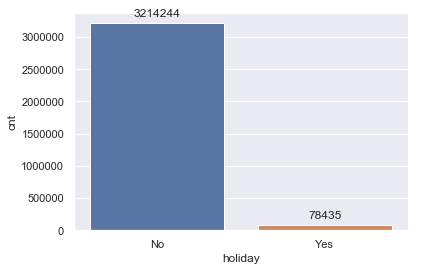

In [114]:
#checking holiday vs cnt
sns.set()
ax = sns.barplot(x=day["holiday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

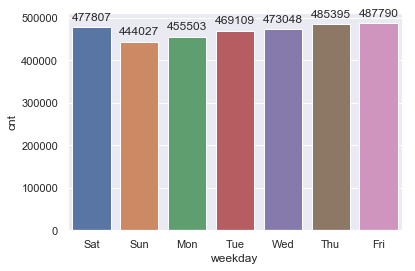

In [115]:
#checking weekday vs cnt
sns.set()
ax = sns.barplot(x=day["weekday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

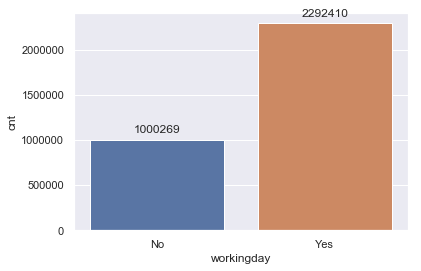

In [116]:
#checking workingday vs cnt
sns.set()
ax = sns.barplot(x=day["workingday"], y=day["cnt"], hue=None, data = day, estimator = sum, ci = None)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Based on the above plots, **holiday** and **workingday** seem to have a higher impact on overall **cnt** as opposed to **weekday**. So **weekday** can be eliminated out of these three as it does not have any conclusive influence. Let us drop **weekday** but keep **holiday** and **workingday**.

In [117]:
#dropping weekday
day = day.drop(["weekday"], axis = 1)

In [118]:
#checking new shape
day.shape

(731, 8)

In [119]:
#checking new head
day.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,cnt
0,spring,2011,Jan,No,No,Mist/Cloudy,8.175849,985
1,spring,2011,Jan,No,No,Mist/Cloudy,9.083466,801
2,spring,2011,Jan,No,Yes,Clear,1.229108,1349
3,spring,2011,Jan,No,Yes,Clear,1.400000,1562
4,spring,2011,Jan,No,Yes,Clear,2.666979,1600


In [214]:
#saving to disk after categ drop
day.to_csv("categ_dropped_8.csv", header = True, index = False)

## Feature Scaling

Feature scaling only works on **continuous** variables. Let us first see if the data is normally distributed or not. This is done so as to make a decision whether **normalization** or **standardization** needs to be done.

Let us plot a **histogram** of the **temp** variable to see its distribution.

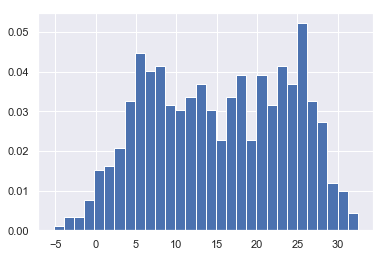

In [120]:
#normal distribution check
%matplotlib inline
plt.hist(day["temp"], normed = True, bins = 30)
plt.show()

By the looks of it, **temp** does not seem to be normally distributed. So we will use **normalization**.

In [121]:
#before normalization check
day.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,cnt
0,spring,2011,Jan,No,No,Mist/Cloudy,8.175849,985
1,spring,2011,Jan,No,No,Mist/Cloudy,9.083466,801
2,spring,2011,Jan,No,Yes,Clear,1.229108,1349
3,spring,2011,Jan,No,Yes,Clear,1.400000,1562
4,spring,2011,Jan,No,Yes,Clear,2.666979,1600


In [122]:
#normalizing
day["temp"] = (day["temp"] - min(day["temp"]))/(max(day["temp"]) - min(day["temp"]))

In [123]:
#after normalization check
day.head(5)

,season,yr,mnth,holiday,workingday,weathersit,temp,cnt
0,spring,2011,Jan,No,No,Mist/Cloudy,0.355170,985
1,spring,2011,Jan,No,No,Mist/Cloudy,0.379232,801
2,spring,2011,Jan,No,Yes,Clear,0.171000,1349
3,spring,2011,Jan,No,Yes,Clear,0.175530,1562
4,spring,2011,Jan,No,Yes,Clear,0.209120,1600


As we can see, **temp** has been normalized.

In [219]:
#writing file to disk
day.to_csv("day_after_scaling.csv", header = True, index = False)

## One Hot Encoding

Since this is a regression problem, any regressor algorithm would NOT be able to take in the categorical variables as inputs when fitting the model. Therefore, **one hot encoding** needs to be done before splitting the dataset into train and test.

In [124]:
#importing from library
from sklearn.preprocessing import OneHotEncoder

In [125]:
#creating a separate array for categorical column names
col = ["season", "yr", "mnth", "holiday", "workingday", "weathersit"]

#applying one hot encoding to day on categorical variables
OneHot = OneHotEncoder(sparse = False)
OHE = pd.DataFrame(OneHot.fit_transform(day[col]))

In [126]:
#viewing the shape of OHE
OHE.shape

(731, 25)

Thus all six categorical variables have been split up into 25 variables.

In [127]:
#checking the head of OHE
OHE.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [128]:
#renaming the columns
OHE = OHE.rename(columns = {0: "fall", 1: "spring", 2: "summer", 3: "winter", 4: "2011", 5: "2012", 6: "Apr", 7: "Aug", 8: "Dec", 9: "Feb", 10: "Jan", 11: "Jul", 12: "Jun", 13: "Mar", 14: "May", 15: "Nov", 16: "Oct", 17: "Sep", 18: "holiday_No", 19: "holiday_Yes", 20: "workingday_No", 21: "working_day_Yes", 22: "Clear", 23: "Light Snow/Light Rain", 24: "Mist/Cloudy"})

In [129]:
#dropping categorical columns of day
day = day.drop(col, axis = 1)

In [130]:
#concatenating OHE to day
day = pd.concat([OHE, day], axis = 1)

In [131]:
#viewing shape
day.shape

(731, 27)

In [132]:
#vieweing head
day.head()

,fall,spring,summer,winter,2011,2012,Apr,Aug,Dec,Feb,...,Sep,holiday_No,holiday_Yes,workingday_No,working_day_Yes,Clear,Light Snow/Light Rain,Mist/Cloudy,temp,cnt
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.355170,985
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.379232,801
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.171000,1349
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.175530,1562
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.209120,1600


In [241]:
#writing to disk
day.to_csv("dayOHE.csv", index = False, header = True)

Now after **One Hot Encoding**, our dataset has 27 variables. The justification for this is the following:

+ **season** has 4 types (fall, spring, summer, winter)
+ **yr** has 2 types (2011, 2012)
+ **mnth** has 12 types (Apr, Aug, Dec, Feb, Jan, Jul, Jun, Mar, May, Nov, Oct, Sep)
+ **holiday** has 2 types (No, Yes)
+ **workingday** has 2 types (No, Yes)
+ **weathersit** has 3 types (Clear, Light Snow/Light Rain, Mist/Cloudy)
+ **temp** has 1 type
+ **cnt** has 1 type

Adding all these up, we get 27 variables. 


## Splitting

Now that all the preprocessing has been done, let us split the data into train and test. The model will be made on the train data, and then implemented on the test data. Then the accuracy of the model will be determined based on the accuracy obtained on the test data.

I will be using **simple random sampling** to split the data into **train** and **test**

In [96]:
#importing from library
from sklearn.model_selection import train_test_split

In [243]:
#the split
train, test = train_test_split(day, test_size = 0.2)

In [244]:
#checking shape
print(train.shape)
print(test.shape)

(584, 27)
(147, 27)


In [247]:
#writing file to disk
train.to_csv("day_train.csv", index = False, header = True)
test.to_csv("day_test.csv", index = False, header = True)

# Machine Learning Algorithm Implementation

Now that everything has been done, I will start implementing different ML algorithms and check the accuracies of all the models individually.
Here I will be using the following algorithms:

+ Decision Tree
+ Random Forest
+ Linear Regression

## Decision Tree

In [134]:
#importing from library
from sklearn.tree import DecisionTreeRegressor

In [135]:
#making model with no parameters
DT_model = DecisionTreeRegressor().fit(train.iloc[:, 0:26], train.iloc[:, 26])

In [136]:
#making model with max_depth = 2
DT_2_model = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:, 0:26], train.iloc[:, 26])

In [137]:
#checking the different parameters of the model
DT_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Once the model has been created, it will be used on the test data.

In [138]:
#applying model on test
DT_pred = DT_model.predict(test.iloc[:, 0:26])

In [139]:
#applying model on test
DT_2_pred = DT_2_model.predict(test.iloc[:, 0:26])

Let us take a look at the predicted values, to get an idea.

In [140]:
#checking predicted values
DT_pred

array([7804. , 6864. , 2659. , 7444. , 4661. , 6889. , 7290. , 5191. ,
       2743. , 3831. , 4634. , 3747. , 4553. , 1536. , 4274. , 2423. ,
       5302. , 4127. , 5936. , 4985. , 3926. , 7013. , 5202. , 7129. ,
       3747. , 4127. , 3744. , 4585. , 5976. , 2689. , 3292. , 4803. ,
       3805. , 5119. , 7109. ,   22. , 4835. , 3940. , 5169. , 5870. ,
       7338. , 1450. , 2710. , 1360. , 2710. , 4549. , 7767. , 7804. ,
       4570. , 7580. , 2471. , 5058. , 8714. , 4845. , 4592. , 4826. ,
       5870. , 5191. , 4326. , 1096. , 4579. , 2210. , 4120. , 4187. ,
       6544. , 4575. , 6864. , 4067. , 6565.5, 2046. , 6031. , 4381. ,
       5905. , 4400. , 5319. , 5312. , 4649. , 5041. , 3747. , 4634. ,
       4748. , 3068. , 5976. , 3214. , 5312. , 1977. , 4274. , 1011. ,
       7006. , 2429. , 4375. , 4120. , 1011. , 2843. , 3974. , 2429. ,
       4687. , 6830. , 4205. , 3272. , 5146. , 5312. , 7720. , 6978. ,
       4575. , 4187. , 2743. , 2294. , 4649. , 1708. , 1650. , 3926. ,
      

Now I will define a function MAPE, which stands for **Mean Absolute Percentage Error**. Everytime a model is created throughout this exercise, the actual values of the test data will be sent along with the new predicted values, and then this function will calculate the MAPE.

In [141]:
#define MAPE
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

In [142]:
#calling MAPE
MAPE(test.iloc[:, 26], DT_pred)

20.108101605753593

In [143]:
MAPE(test.iloc[:, 26], DT_2_pred)

26.415773794471598

Thus, a **decision tree regressor** with no parameters gives us a MAPE of 22.87% (accuracy = 77.13%), while one with max_depth = 2 gives us a MAPE of 26.41%, or in other words, the accuracy is 73.59%. Let us see if this accuracy can be improved using other models.

## Random Forest

In [144]:
#importing from library
from sklearn.ensemble import RandomForestRegressor

In [145]:
#making the model
RF_model = RandomForestRegressor(n_estimators = 400).fit(train.iloc[:, 0:26], train.iloc[:, 26])

In [146]:
#checking the different parameters of the model
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Once the model has been created, it will be used on the test data.

In [147]:
#applying model on test
RF_pred = RF_model.predict(test.iloc[:, 0:26])

Let us take a look at the predicted values, to get an idea.

In [148]:
RF_pred

array([7846.74483929, 7254.45421429, 3432.91      , 7022.9075    ,
       4859.27      , 7300.6875    , 6846.465     , 4653.5625    ,
       2855.1075    , 3382.845     , 4703.5       , 3309.3775    ,
       4573.865     , 1752.655     , 4858.4725    , 1770.9275    ,
       5229.475     , 5133.07416667, 6044.52      , 4716.485     ,
       3787.9625    , 7021.0375    , 4955.4225    , 7302.675     ,
       3212.6075    , 5670.275     , 3671.19      , 5806.485     ,
       6385.2275    , 2946.19      , 2862.01      , 4762.9675    ,
       4298.3125    , 5100.7325    , 5924.4425    , 4054.2975    ,
       4507.84      , 3815.3875    , 6187.775     , 6138.115     ,
       7135.2725    , 1428.605     , 2673.105     , 1460.11      ,
       2673.105     , 5287.85      , 7677.40175   , 7789.16758929,
       4751.165     , 7422.14875   , 2237.3275    , 4832.2875    ,
       8383.472375  , 4532.0475    , 4546.246     , 4659.7325    ,
       5789.6775    , 4660.065     , 4454.96816667, 1050.4425 

In [149]:
#calling MAPE to get the MAPE
MAPE(test.iloc[:, 26], RF_pred)

16.585946641365233

Thus, a **random forest regressor** with number of estimators = 400 gives us a MAPE of 16.66%, or in other words, the accuracy is 83.34%. I have tried building a random forest by taking 200, 300 and 500 estimators and all of these give MAPE in the same ballpark. So I decided to go with 400 estimators. Let us see if this accuracy can be improved using other models.

## Linear Regression

In [150]:
#importing from required library
import statsmodels.api as sm

In [151]:
#building model on train
LR_model = sm.OLS(train.iloc[:, 26], train.iloc[:, 0:26]).fit()

In [152]:
#checking the summary
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sat, 14 Sep 2019   Prob (F-statistic):          3.67e-198
Time:                        17:15:02   Log-Likelihood:                -4744.5
No. Observations:                 584   AIC:                             9531.
Df Residuals:                     563   BIC:                             9623.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fall                    123.0584    163.450      0.753      0.452    -197.989     444.105
spring                 -613.9639    139.278     -4.408      0.000    -887.532    -340.396
summer                  255.8718    141.759      1.805      0.072     -22.570     534.313
winter                 1019.5073    157.993      6.453      0.000     709.180    1329.834
2011                   -627.0533     62.112    -10.095      0.000    -749.053    -505.053
2012                   1411.5268     70.705     19.964      0.000    1272.648    1550.405
Apr                     124.6252    178.335      0.699      0.485    -225.658     474.908
Aug                     225.3069    213.500      1.055      0.292    -194.047     644.661
Dec                    -481.1945    171.174     -2.811      0.005    -817.413    -144.976
Feb                    -227.9067    196.862     -1.158      0.247    -614.581     158.767
Jan                    -365.7390    201.455     -1.815      0.070    -761.434      29.956
Jul                      -4.1501    221.643     -0.019      0.985    -439.498     431.198
Jun                     382.5833    184.636      2.072      0.039      19.924     745.243
Mar                     268.2501    147.337      1.821      0.069     -21.148     557.648
May                     424.3543    192.645      2.203      0.028      45.964     802.744
Nov                    -465.0401    202.259     -2.299      0.022    -862.314     -67.766
Oct                     138.1651    195.530      0.707      0.480    -245.892     522.222
Sep                     765.2191    175.221      4.367      0.000     421.053    1109.385
holiday_No              597.8743     92.656      6.453      0.000     415.882     779.867
holiday_Yes             186.5992    140.401      1.329      0.184     -89.175     462.374
workingday_No           309.2328     64.875      4.767      0.000     181.805     436.660
working_day_Yes         475.2407     71.885      6.611      0.000     334.045     616.436
Clear                  1278.3003     79.049     16.171      0.000    1123.033    1433.568
Light Snow/Light Rain -1127.2566    152.195     -7.407      0.000   -1426.196    -828.317
Mist/Cloudy             633.4299     81.297      7.792      0.000     473.748     793.112
temp                   3407.8898    384.550      8.862      0.000    2652.561    4163.218
==============================================================================
Omnibus:                      101.498   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.473
Skew:                          -0.814   Prob(JB):                     4.24e-70
Kurtosis:                       6.237   Cond. No.                     2.19e+16
==============================================================================

In [153]:
#predicting on the test values
LR_pred = LR_model.predict(test.iloc[:, 0:26])

In [154]:
#calling MAPE
MAPE(test.iloc[:, 26], LR_pred)

15.624063629912847

Thus, a **linear regression** model gives us a MAPE of 15.62%, or in other words, the accuracy is 84.38%. This model gives the maximum accuracy out of all three models and so I will be keeping this model.

*Note: I have also built up a separate model where I did not drop **hum** and **windspeed** during Feature Scaling like I did here. I got an MAPE of 31.42% with Decision Tree, 17.76% with Random Forest and 17.94% with Linear Regression. So it is better to drop these two variables as without these, the MAPE is lesser.*